___
# Ciência dos Dados - PROJETO 1

## Pedro Henrique Greco Lopes

___

## Como presença da figura materna influencia na vida de crianças e jovens até 18 anos. 

___
## Introdução

Na internet pode-se encontrar diversas matérias e estudos que divagam sobre os efeitos pisicológicos que a ausência da figura materna causa nas crianças e jovens, porém esse assunto é pouco explorado usando dados do dia a dia dessas crianças, para entender qual é a diferença na prática. Este estudo pretende analisar o perfil de crianças e jovens brasileiras, de 5 a 18 anos de idade, quanto a presença ou não da figura materna para entender qual é o peso desta em diversos âmbitos da vida, como escolaridade, trabalho e até se tem influênca em ter filhos em idades prematuras.

___
## Filtros da base de dados

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from numpy import arange

In [2]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\pedro\Desktop\3 Semestre\DP-CD


In [3]:
#Se usar o arquivo descompactado
nad15 = pd.read_csv('PES2015.csv',sep=',')
nad11 = pd.read_csv('PES2011.csv',sep=',')

In [4]:
nad15 = nad15.loc[nad15.V8005<18,['V8005','V0405','V0302','V4803','V4745','V0602','V4743','V0701','V9001','V1101','V4721']]

#V8005 - Idade
#V0302 - Sexo
#V0405 - Tem mae viva
#V4803 - Anos de estudo
#V4745 - Nível de intrução mais alto
#V0602 - Frequenta escola ou creche
#V4743 - Faixa de rend mensal per capita
#V0701 - Teve algum trabalho no último ano (de 5 a 9 anos de idade)
#V9001 - Trabalho (10 ou mais de idade)
#V1101 - Teve algum filho nascido vivo até a data de referência
#V4721 - Rendimento mensal domiciliar

In [5]:
nad11 = nad11.loc[nad11.V8005<18,['V8005','V0405','V0302','V4803','V4745','V0602','V4743','V0701','V1101','V9001','V4721']]

#V8005 - Idade
#V0302 - Sexo
#V0405 - Tem mae viva
#V4803 - Anos de estudo
#V4745 - Nível de intrução mais alto alcançado
#V0602 - Frequenta escola ou creche
#V4743 - Faixa de rend mensal per capita
#V0701 - Teve algum trabalho no último ano (de 5 a 9 anos de idade)
#V9001 - Trabalho (10 ou mais de idade)
#V1101 - Teve algum filho nascido vivo até a data de referência
#V4721 - Rendimento mensal domiciliar

In [6]:
#Tem mãe viva
nad15.V0405 = nad15.V0405.astype('category')
nad15.V0405.cat.categories = ('Sim','Não','Não sabe')
#Trabalhou (acima de 10)
nad15.V9001 = nad15.V9001.astype('category')
nad15.V9001.cat.categories = ('Sim','Não')
#Sexo
nad15.V0302 = nad15.V0302.astype('category')
nad15.V0302.cat.categories = ('Masculino','Feminino')
#Trabalhou (5 a 9)
nad15.V0701 = nad15.V0701.astype('category')
nad15.V0701.cat.categories = ('Sim','Não')
#Teve filho
nad15.V1101 = nad15.V1101.astype('category')
nad15.V1101.cat.categories = ('Sim','Não')
#Frquenta escola ou creche
nad15.V0602 = nad15.V0602.astype('category')
nad15.V0602.cat.categories = ('Sim','Não')
#Nivel mais alto de instrução
nad15.V4745 = nad15.V4745.astype('category')
nad15.V4745.cat.categories = ('Sem instrução','Fundamental incompleto','Fundamental completo','Médio incompleto','Médio completo','Superior incompleto','Superior completo')
#Renda
nad15.V4743 = nad15.V4743.astype('category')
nad15.V4743.cat.categories = ('Sem rendimento','Até ¼ salário mínimo','De ¼ até ½ salário mínimo','De ½ até 1 salário mínimo','De 1 até 2 salários mínimos','De 2 até 3 salários mínimos','De 3 até 5 salários mínimos','De 5 salários mínimos','Sem Declaração')
nad15.V4621 = nad15.V4721.astype('float')

nad15=nad15.rename(columns={'V8005':'Idade'})
nad15=nad15.rename(columns={'V0302': 'Sexo'})
nad15=nad15.rename(columns={'V0405':'TemMãeViva'})
nad15=nad15.rename(columns={'V4803':'AnosDeEstudo'})
nad15=nad15.rename(columns={'V4745':'Nivelestudo'})
nad15=nad15.rename(columns={'V0602':'VaiParaEscola'})
nad15=nad15.rename(columns={'V4743':'Faixa de renda mensal p.c.'})
nad15=nad15.rename(columns={'V0701':'Trabalhou9'})
nad15=nad15.rename(columns={'V9001':'Trabalhou10'})
nad15=nad15.rename(columns={'V1101':'TeveFilho'})
nad15=nad15.rename(columns={'V4721':'RENDA'})


In [7]:
#nad11=nad11.rename(columns={'V9001':'Trabalhou no último ano (crianças acima de 10)'})
#Tem mãe viva
nad11.V0405 = nad11.V0405.astype('category')
nad11.V0405.cat.categories = ('Sim','Não','Não sabe')
Trabalhou (acima de 10)
nad11.V9001 = nad15.V9001.astype('category')
nad11.V9001.cat.categories = ('Sim','Não')
#Sexo
nad11.V0302 = nad11.V0302.astype('category')
nad11.V0302.cat.categories = ('Masculino','Feminino')
#Trabalhou (5 a 9)
nad11.V0701 = nad11.V0701.astype('category')
nad11.V0701.cat.categories = ('Sim','Não')
#Teve filho
nad11.V1101 = nad11.V1101.astype('category')
nad11.V1101.cat.categories = ('Sim','Não')
#Frquenta escola ou creche
nad11.V0602 = nad11.V0602.astype('category')
nad11.V0602.cat.categories = ('Sim','Não')
#Nivel mais alto de instrução
nad11.V4745 = nad11.V4745.astype('category')
nad11.V4745.cat.categories = ('Sem instrução','Fundamental incompleto','Fundamental completo','Médio incompleto','Médio completo','Superior incompleto','Superior completo')
#Renda
nad11.V4743 = nad11.V4743.astype('category')
nad11.V4743.cat.categories = ('Sem rendimento','Até ¼ salário mínimo','De ¼ até ½ salário mínimo','De ½ até 1 salário mínimo','De 1 até 2 salários mínimos','De 2 até 3 salários mínimos','De 3 até 5 salários mínimos','De 5 salários mínimos','Sem Declaração')

nad11.V4621 = nad11.V4721.astype('float')

nad11=nad11.rename(columns={'V8005':'Idade'})
nad11=nad11.rename(columns={'V0302': 'Sexo'})
nad11=nad11.rename(columns={'V0405':'TemMãeViva'})
nad11=nad11.rename(columns={'V4803':'AnosDeEstudo'})
nad11=nad11.rename(columns={'V4745':'Nivelestudo'})
nad11=nad11.rename(columns={'V0602':'VaiParaEscola'})
nad11=nad11.rename(columns={'V4743':'Faixa de renda mensal p.c.'})
nad11=nad11.rename(columns={'V0701':'Trabalhou9'})
nad11=nad11.rename(columns={'V9001':'Trabalhou10'})
nad11=nad11.rename(columns={'V1101':'TeveFilho'})
nad11=nad11.rename(columns={'V4721':'RENDA'})

# Análise sobre a condição de vida da mãe

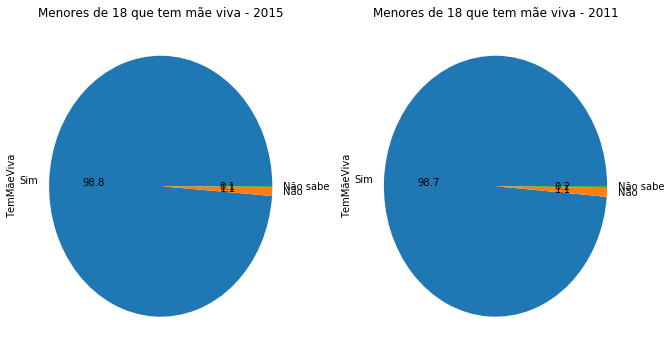

In [8]:
fig = plt.figure(figsize=(17, 6))
                 
ut1 = (nad15.TemMãeViva.value_counts(sort=False,normalize=True)*100).round(decimals=1)       
ut2 = (nad11.TemMãeViva.value_counts(sort=False,normalize=True)*100).round(decimals=1)
        
plt.subplot(131)
plot = ut1.plot(kind='pie',title='Menores de 18 que tem mãe viva - 2015',autopct='%.1f')
plt.subplot(132)
plot = ut2.plot(kind='pie',title='Menores de 18 que tem mãe viva - 2011',autopct='%.1f')  

plt.show()

In [39]:
nad15.TemMãeViva.value_counts()

Sim         94146
Não          1016
Não sabe      108
Name: TemMãeViva, dtype: int64

Estes dois gráficos mostram a distribuição entre jovens e crianças sobre a questão de terem a mãe viva ou não. Não há uma variação entre os anos de 2015, no qual 98.8% dos jovens tem mãe viva, e 2011, no qual 98.7% tem mãe viva. Aqui é importante notar que, apesar das respostas 'Não' e 'Não sabe' estarem separadas, para o estudo em questão elas seriam iguais, já que em ambos casos a figura materna está completamente ausente.

# Análise da presença dos jovens em instituições educativas

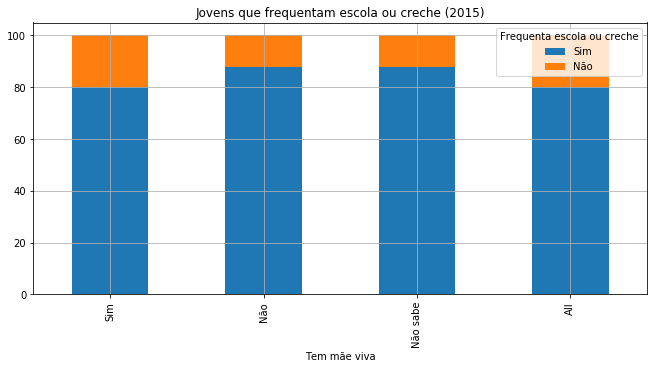

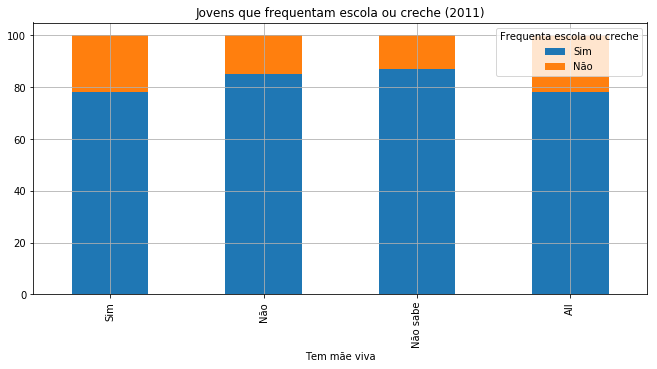

In [38]:
EscolaMaeViva15 = ((pd.crosstab(nad15.TemMãeViva,nad15.VaiParaEscola,margins=True, rownames=["Tem mãe viva"], colnames=["Frequenta escola ou creche"], normalize='index')*100).round(decimals=0))
EscolaMaeViva15.plot(kind="bar",title = "Jovens que frequentam escola ou creche (2015)",stacked = True,grid=True,figsize = (11,5))

EscolaMaeViva11 = ((pd.crosstab(nad11.TemMãeViva,nad11.VaiParaEscola,margins=True, rownames=["Tem mãe viva"], colnames=["Frequenta escola ou creche"], normalize='index')*100).round(decimals=0))
EscolaMaeViva11.plot(kind="bar",title = "Jovens que frequentam escola ou creche (2011)",stacked = True,grid=True,figsize = (11,5))

## Os primeiros gráficos em que se pode comparar aqueles que não tem a figura materna com aqueles que a tem tratam sobre as frequências dos jovens a instituições voltadas para a educação. Pode-se perceber que a frequência relativa daqueles jovens que tem mãe e não vão para alguma instituição de ensino é maior do que aqueles que não tem ou não sabem se a mãe esta viva. Porém a diferença é sutil. Não há uma variação entre os anos.

# Análise do estudo de jovens na faixa de 16 a 18 anos
### Aqui o ideal seria que tivessem entre 11 a 12 anos de estudo e estivessem no Ensino Médio ou Médio completo

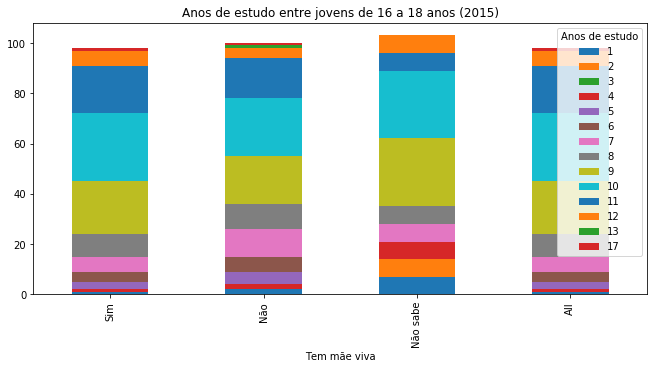

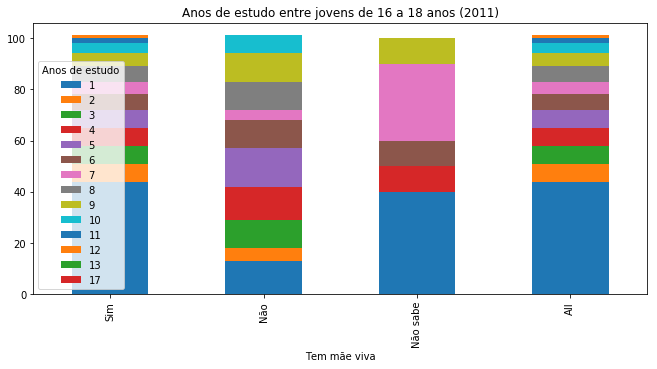

In [10]:
#Anos de estudo ideais para jovens de 16 a 18 anos ---- 11 a 12 anos de estudo (1o fund ao 3o colegial)
AnosIdeal18 = nad15.loc[(nad15.Idade<=18)&(nad15.Idade>=16),'TemMãeViva']
anosideal18 = nad11.loc[(nad11.Idade<=18)&(nad15.Idade>=16),'TemMãeViva']

EstudoIdeal1 = ((pd.crosstab(AnosIdeal18,nad15.AnosDeEstudo,margins=True, rownames=["Tem mãe viva"], colnames=["Anos de estudo"], normalize='index')*100).round(decimals=0))
estudoideal2 = ((pd.crosstab(anosideal18,nad11.AnosDeEstudo,margins=True, rownames=["Tem mãe viva"], colnames=["Anos de estudo"], normalize='index')*100).round(decimals=0))
EstudoIdeal1.plot(kind="bar",title = 'Anos de estudo entre jovens de 16 a 18 anos (2015)',stacked = True,figsize = (11,5))
estudoideal2.plot(kind="bar",title = 'Anos de estudo entre jovens de 16 a 18 anos (2011)',stacked = True,figsize = (11,5))



In [11]:
AnosIdeal18.value_counts()

Sim         12139
Não           255
Não sabe       15
Name: TemMãeViva, dtype: int64

In [12]:
anosideal18.value_counts()

Sim         3555
Não           55
Não sabe      10
Name: TemMãeViva, dtype: int64

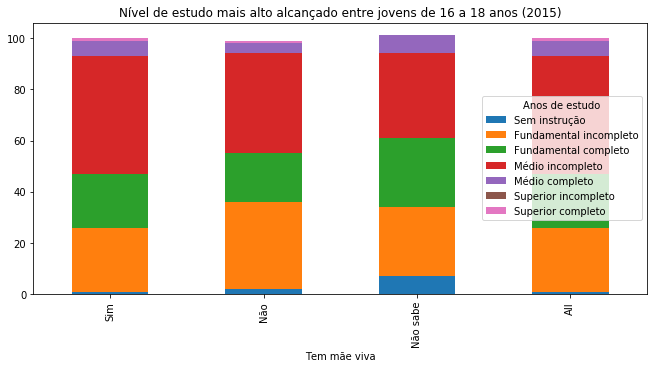

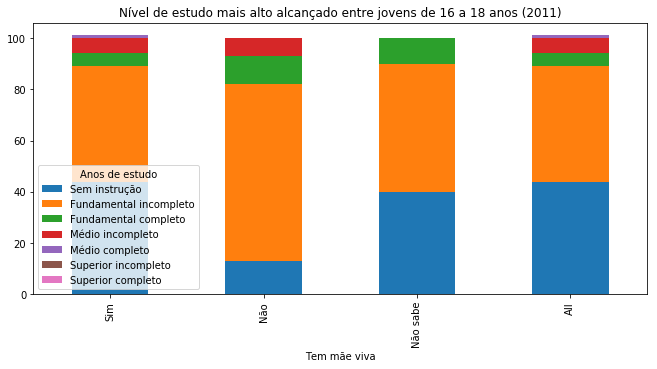

In [13]:
EstudoIdeal1 = ((pd.crosstab(AnosIdeal18,nad15.Nivelestudo,margins=True, rownames=["Tem mãe viva"], colnames=["Anos de estudo"], normalize='index')*100).round(decimals=0))
estudoideal2 = ((pd.crosstab(anosideal18,nad11.Nivelestudo,margins=True, rownames=["Tem mãe viva"], colnames=["Anos de estudo"], normalize='index')*100).round(decimals=0))
EstudoIdeal1.plot(kind="bar",title = 'Nível de estudo mais alto alcançado entre jovens de 16 a 18 anos (2015)',stacked = True,figsize = (11,5))
estudoideal2.plot(kind="bar",title = 'Nível de estudo mais alto alcançado entre jovens de 16 a 18 anos (2011)',stacked = True,figsize = (11,5))


## Nesta parte da análise é importante mostrar que em 2011 o número de jovens de 16 a 18 anos que se encaixa nesta parte é muito menor que o número em 2015. Por isso há uma diferença gritante nos gráficos. Nesta faixa de idade o número de anos de estudo ideal segundo normas do governo federal seriam entre 10 e 12 anos e os jovens deveriam estar no ensino médio ou ja ter ele finalizado. Ao comparar as colunas daqueles que tem mãe viva e daqueles que nao, pode-se notar que em ambos casos a situação não está ideal. Uma enorme parte não completou o fundamental ainda. A parcela daqueles que tem mçae viva e está no ensino médio (ideal) é maior que a parcela com mesmas características daqueles que nçao tem mçae viva. E a parcela que não tem nenhum tipo de instrução é maior entre aqueles que não sabem e não tem mãe viva (olhando para 2015).

# Análise do estudo de jovens na faixa de 13 a 15 anos
### Aqui o ideal seria que tivessem entre 8 a 10 anos de estudo e estivessem finalizando ou ja finalizado o Ensino Fundamental

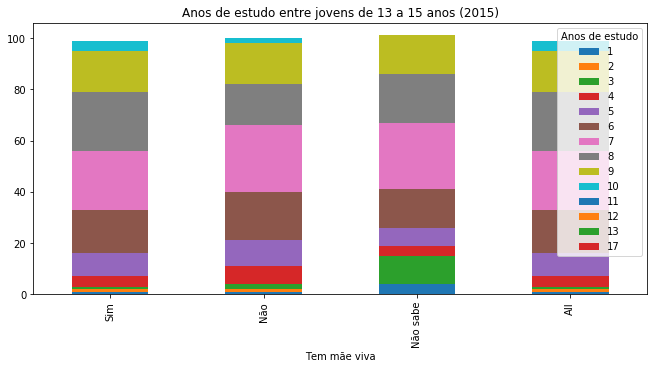

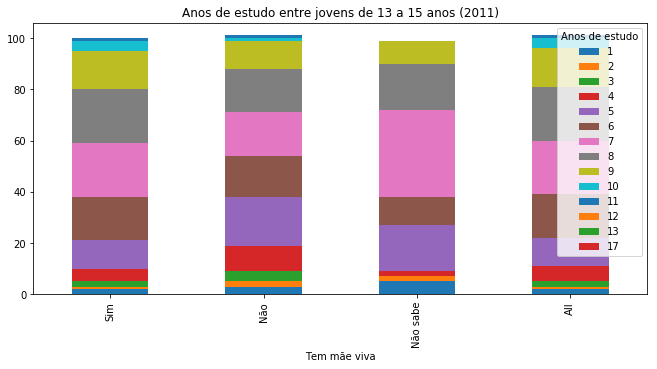

In [14]:
#Anos de estudo ideais para jovens de 13 a 15 anos ---- 8 a 10 anos de estudo (Até o 1o colegial)
AnosIdeal15 = nad15.loc[(nad15.Idade<=15)&(nad15.Idade>=13),'TemMãeViva']
anosideal15 = nad11.loc[(nad11.Idade<=15)&(nad11.Idade>=13),'TemMãeViva']

EstudoIdeal2 = ((pd.crosstab(AnosIdeal15,nad15.AnosDeEstudo,margins=True, rownames=["Tem mãe viva"], colnames=["Anos de estudo"], normalize='index')*100).round(decimals=0))
estudoideal3 = ((pd.crosstab(anosideal15,nad11.AnosDeEstudo,margins=True, rownames=["Tem mãe viva"], colnames=["Anos de estudo"], normalize='index')*100).round(decimals=0))

EstudoIdeal2.plot(kind="bar",title = 'Anos de estudo entre jovens de 13 a 15 anos (2015)',stacked = True,figsize = (11,5))
estudoideal3.plot(kind="bar",title = 'Anos de estudo entre jovens de 13 a 15 anos (2011)',stacked = True,figsize = (11,5))


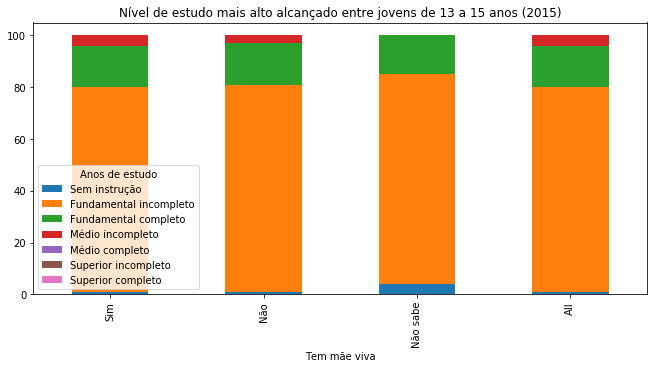

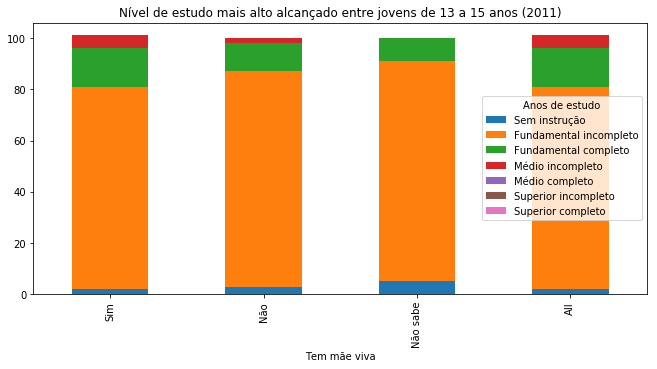

In [15]:
EstudoIdeal1 = ((pd.crosstab(AnosIdeal15,nad15.Nivelestudo,margins=True, rownames=["Tem mãe viva"], colnames=["Anos de estudo"], normalize='index')*100).round(decimals=0))
estudoideal2 = ((pd.crosstab(anosideal15,nad11.Nivelestudo,margins=True, rownames=["Tem mãe viva"], colnames=["Anos de estudo"], normalize='index')*100).round(decimals=0))
EstudoIdeal1.plot(kind="bar",title = 'Nível de estudo mais alto alcançado entre jovens de 13 a 15 anos (2015)',stacked = True,figsize = (11,5))
estudoideal2.plot(kind="bar",title = 'Nível de estudo mais alto alcançado entre jovens de 13 a 15 anos (2011)',stacked = True,figsize = (11,5))


## A situação nesta faixa etária é melhor do que a faixa dos mais velhos. Aqui em ambos os casos a maior parte está completando o fundamental. Porém a parcela que já está n ensino médio é maior entre aqueles que tem mãe viva.

# Análise do estudo de jovens na faixa de 8 a 10 anos
### Aqui o ideal seria que tivessem entre 4 a 6 anos de estudo e estivessem no Ensino Fundamental

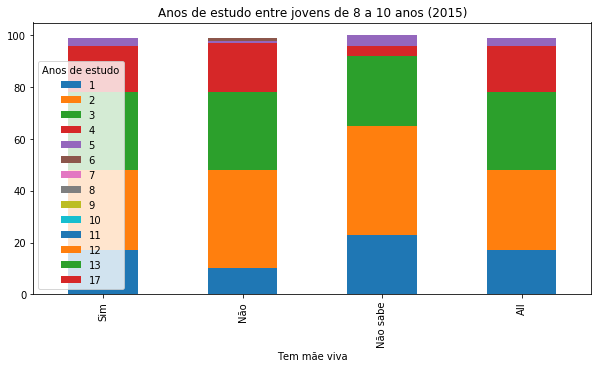

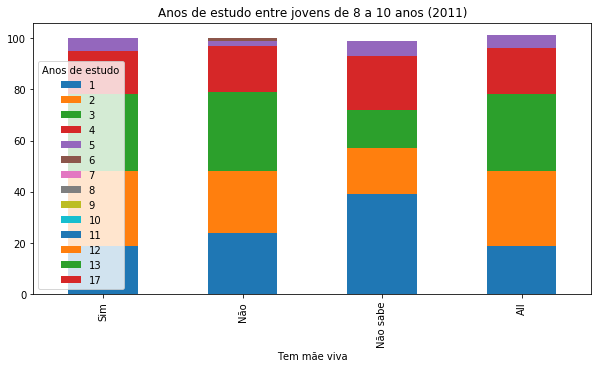

In [16]:
#Anos de estudo ideais para jovens de 8 a 10 anos ---- 4 a 6 anos de estudo (Até o 6o ano)
AnosIdeal10 = nad15.loc[(nad15.Idade<=10)&(nad15.Idade>=8),'TemMãeViva']
anosideal10 = nad11.loc[(nad11.Idade<=10)&(nad11.Idade>=8),'TemMãeViva']

EstudoIdeal2 = ((pd.crosstab(AnosIdeal10,nad15.AnosDeEstudo,margins=True, rownames=["Tem mãe viva"], colnames=["Anos de estudo"], normalize='index')*100).round(decimals=0))
estudoideal4 = ((pd.crosstab(anosideal10,nad11.AnosDeEstudo,margins=True, rownames=["Tem mãe viva"], colnames=["Anos de estudo"], normalize='index')*100).round(decimals=0))

EstudoIdeal2.plot(kind="bar",title = 'Anos de estudo entre jovens de 8 a 10 anos (2015)',stacked = True,figsize = (10,5))
estudoideal4.plot(kind="bar",title = 'Anos de estudo entre jovens de 8 a 10 anos (2011)',stacked = True,figsize = (10,5))

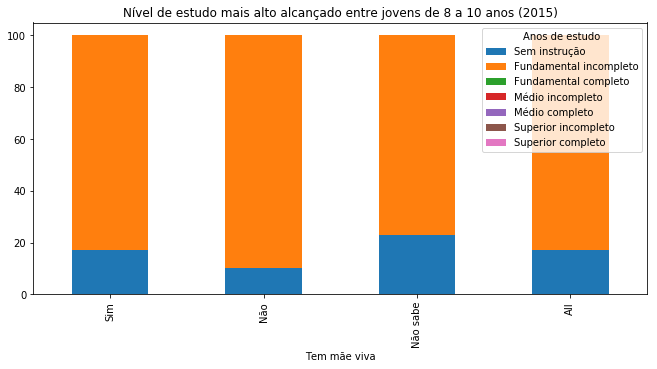

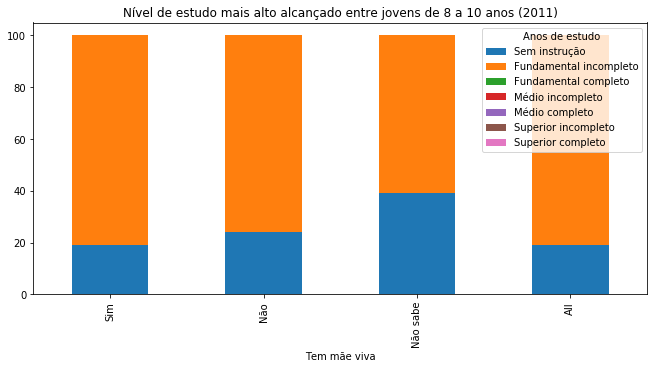

In [17]:
EstudoIdeal1 = ((pd.crosstab(AnosIdeal10,nad15.Nivelestudo,margins=True, rownames=["Tem mãe viva"], colnames=["Anos de estudo"], normalize='index')*100).round(decimals=0))
estudoideal2 = ((pd.crosstab(anosideal10,nad11.Nivelestudo,margins=True, rownames=["Tem mãe viva"], colnames=["Anos de estudo"], normalize='index')*100).round(decimals=0))
EstudoIdeal1.plot(kind="bar",title = 'Nível de estudo mais alto alcançado entre jovens de 8 a 10 anos (2015)',stacked = True,figsize = (11,5))
estudoideal2.plot(kind="bar",title = 'Nível de estudo mais alto alcançado entre jovens de 8 a 10 anos (2011)',stacked = True,figsize = (11,5))

## Aqui, mais uma vez, as diferenças são muito pequenas, e até as situações se invertem nos diferentes anos. Em um a parcela que não tem nenhum tipo de intruição e anos de estudo é menor entre aqueles que não tem mãe e a situação se inverte no outro ano.

# Análise do trabalho entre crianças de 5 a 9 anos de idade

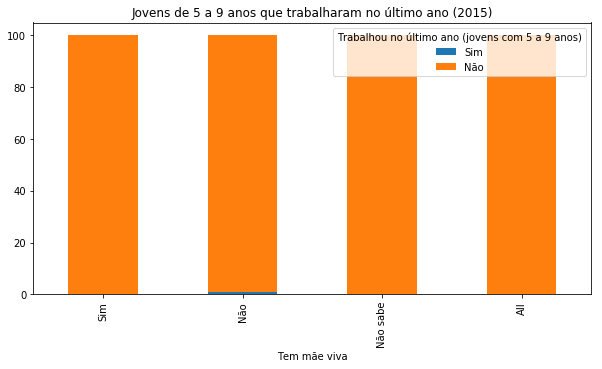

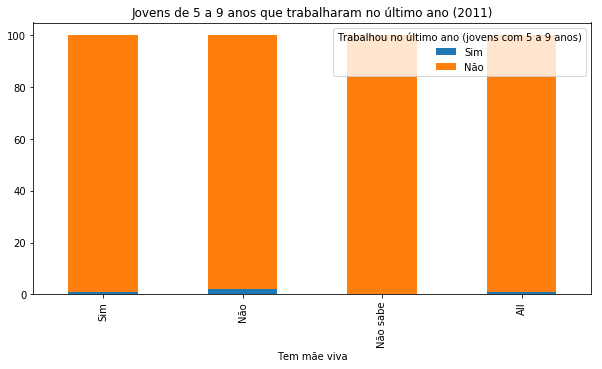

In [18]:
Trabalhomaeviva15 = ((pd.crosstab(nad15.TemMãeViva,nad15.Trabalhou9,margins=True, rownames=["Tem mãe viva"], colnames=["Trabalhou no último ano (jovens com 5 a 9 anos)"], normalize='index')*100).round(decimals=0))
Trabalhomaeviva11 = ((pd.crosstab(nad11.TemMãeViva,nad11.Trabalhou9,margins=True, rownames=["Tem mãe viva"], colnames=["Trabalhou no último ano (jovens com 5 a 9 anos)"], normalize='index')*100).round(decimals=0))


Trabalhomaeviva15.plot(kind="bar", title ='Jovens de 5 a 9 anos que trabalharam no último ano (2015)',stacked = True,figsize = (10,5))
Trabalhomaeviva11.plot(kind="bar", title ='Jovens de 5 a 9 anos que trabalharam no último ano (2011)',stacked = True,figsize = (10,5))
plt.show()



## O trabalho nesta faixa etária é extremamente parecido entre aqueles que nçao tem mãe viva e aqueles que tem. Aparcela daqueles que trabalham é maior entre aqueles que não tem mãe viva.

# Análise do trabalho para jovens com mais de 10 anos e menores de 18

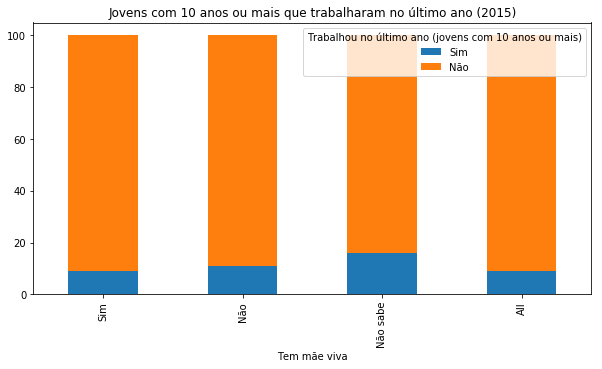

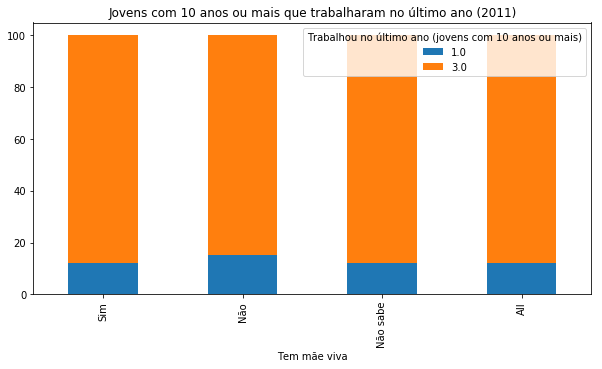

In [19]:
TrabalhoMaeViva15 = ((pd.crosstab(nad15.TemMãeViva,nad15.Trabalhou10,margins=True, rownames=["Tem mãe viva"], colnames=["Trabalhou no último ano (jovens com 10 anos ou mais)"], normalize='index')*100).round(decimals=0))
TrabalhoMaeViva11 = ((pd.crosstab(nad11.TemMãeViva,nad11.Trabalhou10,margins=True, rownames=["Tem mãe viva"], colnames=["Trabalhou no último ano (jovens com 10 anos ou mais)"], normalize='index')*100).round(decimals=0))


TrabalhoMaeViva15.plot(kind="bar", title ='Jovens com 10 anos ou mais que trabalharam no último ano (2015)',stacked = True,figsize = (10,5))
TrabalhoMaeViva11.plot(kind="bar", title ='Jovens com 10 anos ou mais que trabalharam no último ano (2011)',stacked = True,figsize = (10,5))
plt.show()



## Aqui pode-se perceber uma diferença maior. Em ambos os anos aqueles que não tem a figura da mãe presente tem uma maior participação na questão do trabalho. É importante notar que estes dados de trabalho estão limitados, já que a pergunta na pesquisa se refere apenas se a pessoa trabalhou nos últimos 365 dias antes da pesquisa.

# Análise para mulheres com mais de 10 anos se tiveram ou não filho 

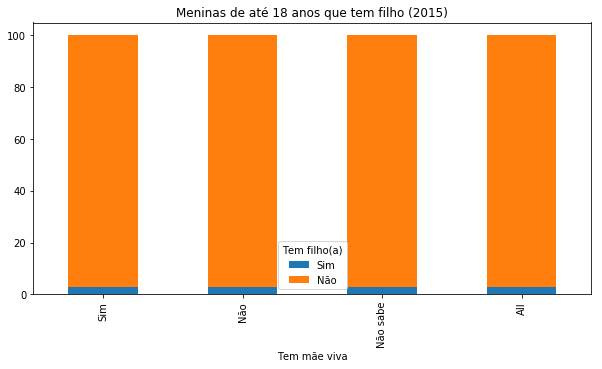

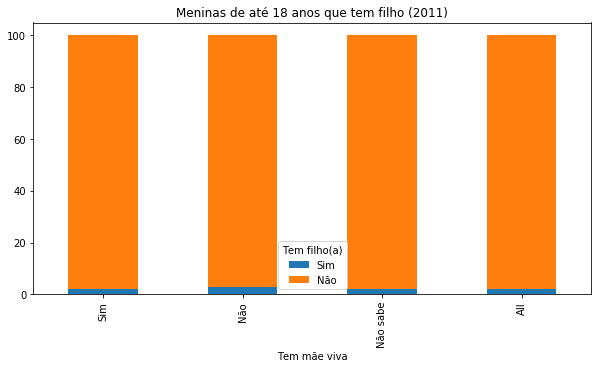

In [20]:
#Teve filho ou não
Tevefilho15 = ((pd.crosstab(nad15.TemMãeViva,nad15.TeveFilho,margins=True, rownames=["Tem mãe viva"], colnames=["Tem filho(a)"], normalize='index')*100).round(decimals=0))
Tevefilho11 = ((pd.crosstab(nad11.TemMãeViva,nad11.TeveFilho,margins=True, rownames=["Tem mãe viva"], colnames=["Tem filho(a)"], normalize='index')*100).round(decimals=0))

Tevefilho15.plot(kind="bar", title ='Meninas de até 18 anos que tem filho (2015)',stacked = True,figsize = (10,5))
Tevefilho11.plot(kind="bar", title ='Meninas de até 18 anos que tem filho (2011)',stacked = True,figsize = (10,5))
plt.show()

## Na questsão das meninas com mais de 10 anos tendo filhos é quase imperceptível a diferença entre os grupos.

# Análise da renda domiciliar dos jovens até 18 anos

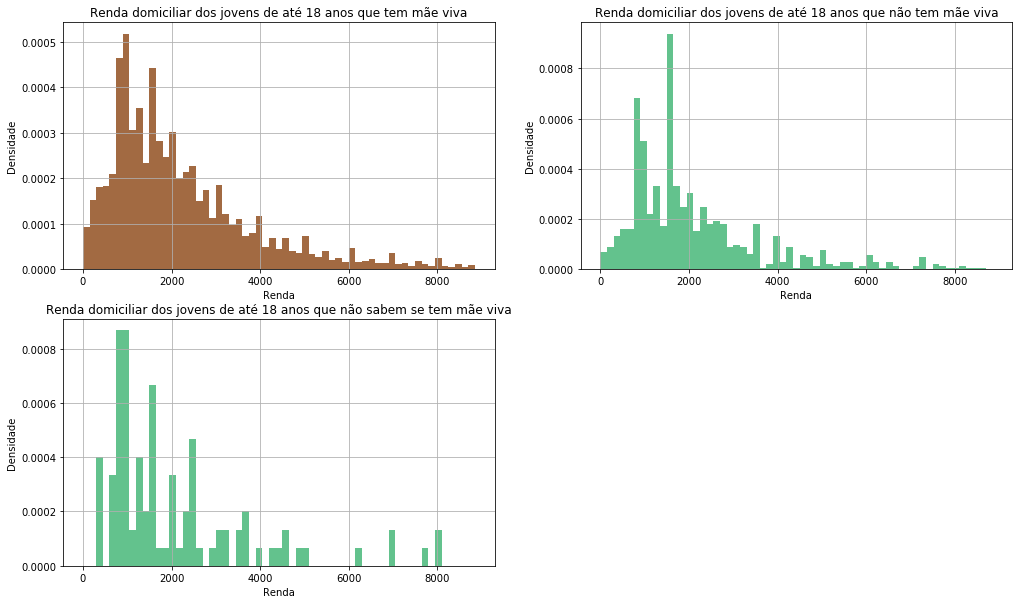

In [36]:
rendaViva = nad15.loc[(nad15.TemMãeViva=='Sim'),'RENDA']
rendaMorta = nad15.loc[(nad15.TemMãeViva=='Não'),'RENDA']
rendasla = nad15.loc[(nad15.TemMãeViva=='Não sabe'),'RENDA']

faixa = arange(0,9000,150)
fig = plt.figure(figsize=(17,10))
plt.subplot(221)
plot=rendaViva.hist(bins=faixa,normed=1,alpha=0.8,color="saddlebrown")
plt.title("Renda domiciliar dos jovens de até 18 anos que tem mãe viva")
plt.ylabel("Densidade")
plt.xlabel("Renda")

plt.subplot(222)
plot=rendaMorta.hist(bins=faixa,normed=1,alpha=0.8,color="mediumseagreen")
plt.title("Renda domiciliar dos jovens de até 18 anos que não tem mãe viva")
plt.ylabel("Densidade")
plt.xlabel("Renda")

plt.subplot(223)
plot=rendasla.hist(bins=faixa,normed=1,alpha=0.8,color="mediumseagreen")
plt.title("Renda domiciliar dos jovens de até 18 anos que não sabem se tem mãe viva")
plt.ylabel("Densidade")
plt.xlabel("Renda")

plt.show()

## A renda domiciliar entre os dois grupos é muito parecida, em ambos os casos se concentrando na faixa entre um pouco menos que mil reais e quatro mil reais.

___
## Conclusão 

### Inicialmente não seria estranho pensar que haveria uma diferença entre aqueles que crescem sem a figura materna e aqueles que a tem durante o desenvolvimento. Porém essa hipotese não se confirma após as questões aqui analisádas. O grupo que não tem a figura materna se assemelha muito ao outro grupo, tirando pequenas diferenças pontuais, eles são praticamente idênticos. Na escolaridade as vezes anos de estudos são menores, mas a progressão entre as faixas etárias é igual, ou seja, não é que aqueles que não tem a mãe presente não estuda, mas está aenas um pouco atrasado, e alguns só, nã´é geral. Em nenhuma questão é possível afirmar que a mãe seja a questão que está fazendo a diferença.

### Então épossível afirmar que a presença ou não da figura materna não diferencia as crianças e jovens nos âmbitos estudados.